# Unemployment Analysis

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Load the dataset

In [2]:
data = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [3]:
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [4]:
# Checking for missing values
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [5]:
# Summarizing data
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [6]:
# Checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [7]:
# Renaming the columns
data.columns=["states", "date", "frequency", "estimated unemployment rate", "estimated employed",
              "estimated labour participation rate", "region", "longitude", "latitude"]
data

,states,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


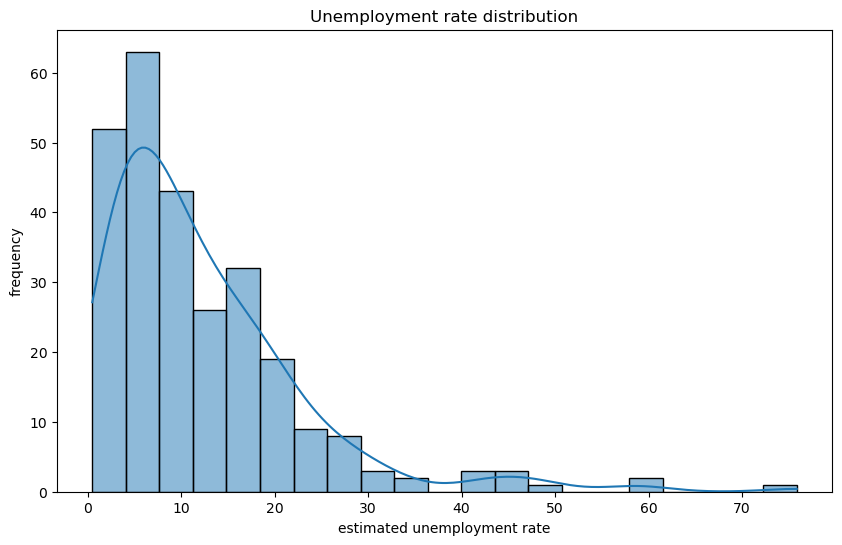

In [8]:
# Visualizing the unemployment rate distribution
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data['estimated unemployment rate'], ax=ax, kde=True);
ax.set(title="Unemployment rate distribution",
      xlabel='estimated unemployment rate',
      ylabel='frequency');

C:\Users\FARAZ\AppData\Local\Temp\ipykernel_26400\2189674396.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


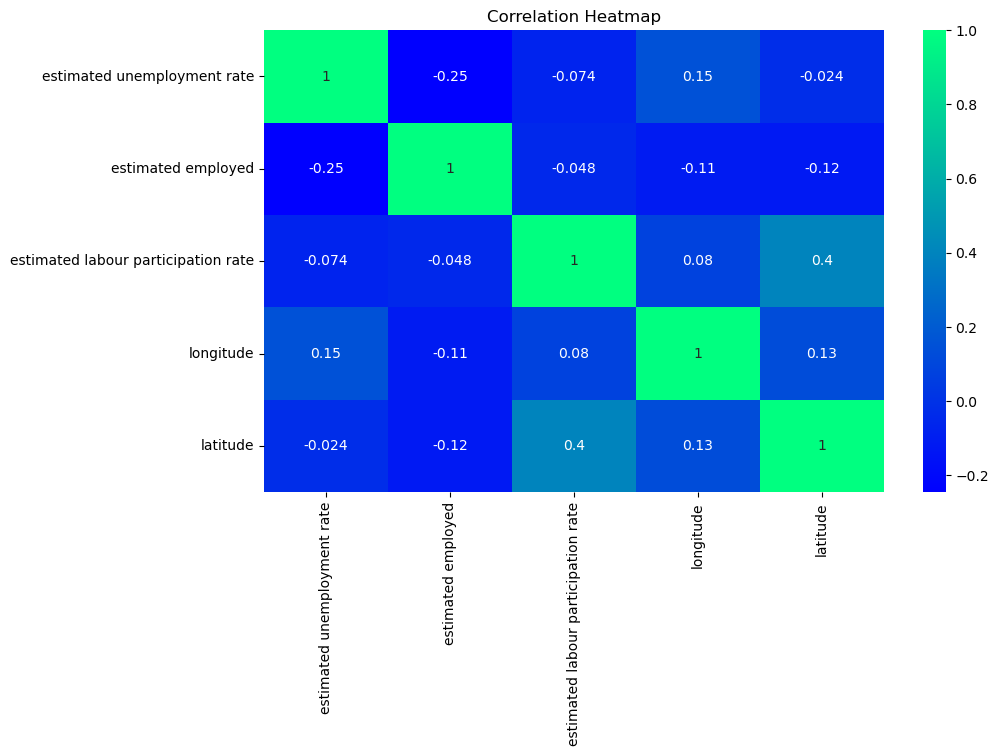

In [9]:
# Calculating correlation between variables
correlation = data.corr()

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='winter')
plt.title("Correlation Heatmap");

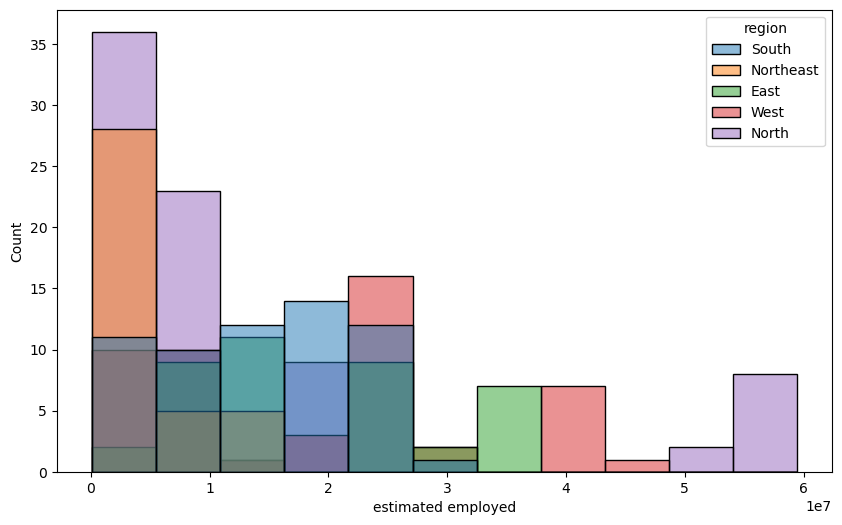

In [10]:
# According to indian regions checking estimated number of employees using histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, x='estimated employed', hue='region');

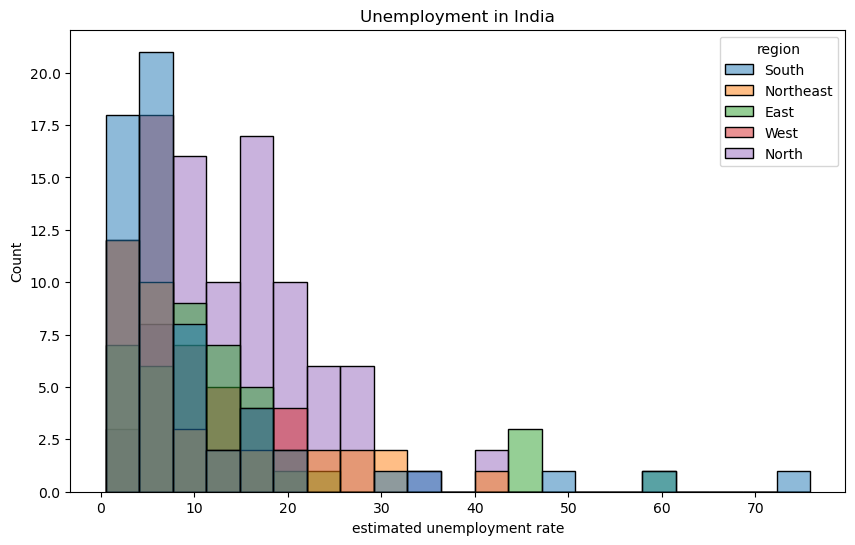

In [11]:
## According to indian regions checking estimated number of unemployment rate using histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, x='estimated unemployment rate', hue='region');
plt.title('Unemployment in India');

In [30]:
plt.figure(figsize=(10, 6))
fig = px.sunburst(data, path=['region', 'states'], values='estimated unemployment rate');
fig.update_layout(title='Sunburst Chart of Unemployment Rate',
                 font=dict(size=15),
                 width=800,
                 height=600);
fig.show()

<Figure size 1000x600 with 0 Axes>

C:\Users\FARAZ\AppData\Local\Temp\ipykernel_26400\3344738187.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



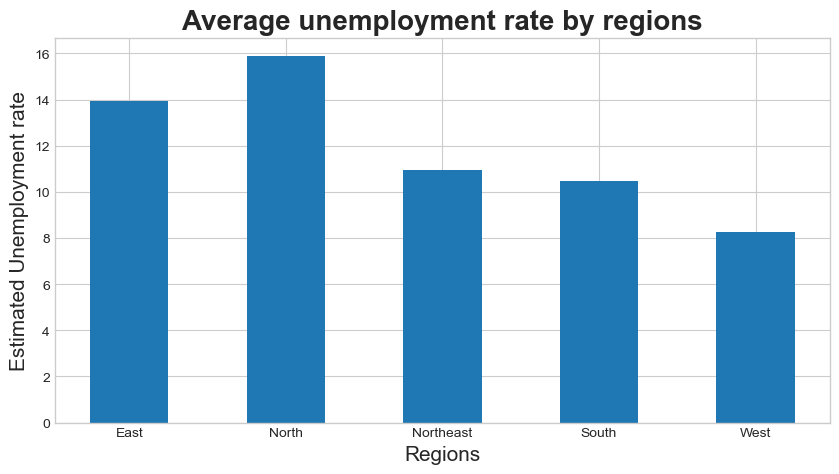

In [86]:
# Average unemployment rate by category
plt.style.use('seaborn-whitegrid')
average_rate = data.groupby('region')['estimated unemployment rate'].mean()
plt.figure(figsize=(10, 5))
plt.bar(average_rate.index, average_rate, width=0.5)
plt.title("Average unemployment rate by regions" , fontsize=20, fontweight='bold')
plt.xlabel("Regions", fontsize=15)
plt.ylabel("Estimated Unemployment rate", fontsize=15);